In [1]:
!wget https://raw.githubusercontent.com/KhanradCoder/LearnMachineLearning/master/cancer.csv

--2022-01-23 18:09:41--  https://raw.githubusercontent.com/KhanradCoder/LearnMachineLearning/master/cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124571 (122K) [text/plain]
Saving to: ‘cancer.csv’

cancer.csv          100%[===================>] 121.65K  --.-KB/s    in 0.02s   

2022-01-23 18:09:41 (7.88 MB/s) - ‘cancer.csv’ saved [124571/124571]



In [2]:
import pandas as pd

dataset = pd.read_csv('cancer.csv')

x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
print(x_train)

[[ 1.3723522  -0.06979594  1.2857648  ... -1.31506422 -0.14530753
   0.25943719]
 [-0.28453698  0.31949607 -0.33351818 ... -0.88515952 -0.56595694
  -0.95346169]
 [-0.8235934   0.18097499 -0.75912534 ... -1.28404017 -0.43186643
  -0.56717739]
 ...
 [ 0.99784985  0.36726196  1.03879739 ...  0.44444266  0.69462997
   0.44655765]
 [-0.80373342 -1.20423583 -0.83856653 ... -0.26024649 -1.18617659
  -1.31190188]
 [-1.30392103 -0.78628429 -1.31521362 ...  0.82559529 -1.03867703
  -0.98018608]]


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])

[[ 2.414511  ]
 [-2.40218195]
 [ 0.55994838]
 [-0.41624845]
 [-2.04258828]
 [-2.67408697]
 [-0.29326902]
 [ 4.93313913]
 [-2.45670276]
 [ 0.53699128]]


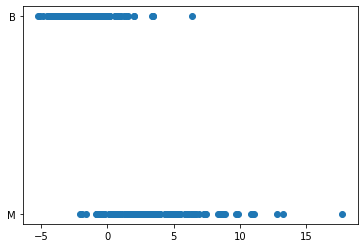

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)

GradientBoostingClassifier()

In [11]:
y_preds = gradientboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[71  1]
 [ 2 40]]


In [14]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier()

In [15]:
y_preds = xgboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[71  1]
 [ 1 41]]
